Option 1: bolus or plug injection of a set amount of the drug at fixed time intervals.

Use impulse forcing to model this situation.

Drug in the blood stream is similar to a heavily damped oscillator being forced by the Dirac Delta function. Equilibrium is when there is no drug present in the blood stream.

The equation we can use to model the amount of drug in the blood stream is $\frac{d^2x}{dt^2} + b\frac{dx}{dt} + w_0^2x = f(t)$ where $b$ is the rate at which the drug leaves the blood stream and $w_0$ is frequency which is a little awkward in this sense. To be heavily damped, the relation $\frac{b^2}{4} > w_0^2$ must be true.

My model: 
Note* I am using arbitrary values for $b$ and $w_0^2$

$f(t)$ is a piecewise function in which a delta function of amplitude $A$ occurs every half hour. This represents the injection of a set amount of the drug at fixed time intervals. So $f(t) = A\delta(t) + A\delta(t-30) + A\delta(t-60) + ...$

$b=5$, $w_0^2 = 3$ To get the equation $\frac{d^2x}{dt^2} + 5\frac{dx}{dt} + 3x = f(t)$

We have initial condition of $x=0$

To Solve:

I'm using the laplace transform technique to solve this.  
$(s^2 + 5s + 3)L(x) = A + Ae^{-30s} + Ae^{-60s}$  

Then
$L(x)=\frac{A}{s^2 + 5s + 3} + \frac{Ae^{-30s}}{s^2 + 5s + 3} + \frac{Ae^{-60s}}{s^2 + 5s + 3} + ...$


In [14]:
# Inverse lapalce transform of the first term. 
s = var("s")
A = var("A")
t = var("t")
F = A/(s^2 + 5*s + 3)
F.inverse_laplace(s,t)

2/13*sqrt(13)*A*e^(-5/2*t)*sinh(1/2*sqrt(13)*t)

Calling the above expression $g(t)$, we can now form the analytical expression for drugs in the blood stream.
$x = u_0(t)*g(t) + u_{30}(t)*g(t-30)+u_{60}(t)*g(t-60)+...$

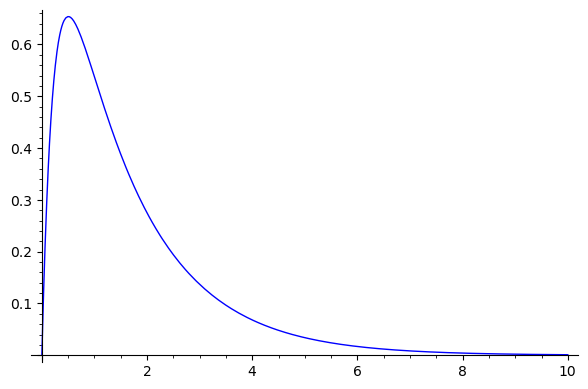

In [15]:
# This is the graph of the first term, See the initially there is no drugs in the blood, but then the level spikes up to roughly 0.65, and then tapers off as the drug leaves the blood.
t, r = var("t r")
A = 4
P = 30

g = 2/13*sqrt(13)*A*e^(-5/2*r)*sinh(1/2*sqrt(13)*r)
plot(g(t), (t,0,10))
# the graph is mg vs time(minutes).

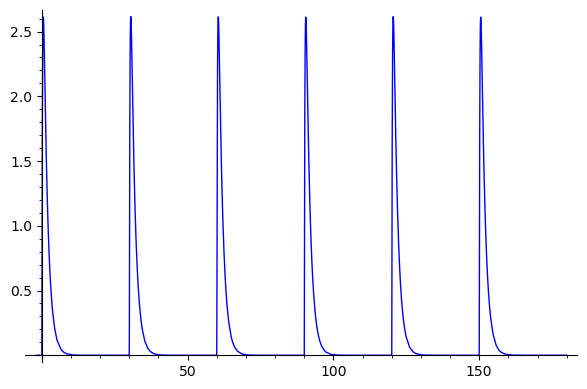

In [16]:
p = 30
#This will graph 6 administraions of the drug as mg vs time (minutes). 

x1 = A*g(t)
x2 = x1 + A*g(t-p)
x3 = x2 + A*g(t-2*p)
x4 = x3 + A*g(t-3*p)
x5 = x4 + A*g(t-4*p)
x6 = x5 + A*g(t-5*p)


x = piecewise([[(-infinity, 0),0],
               [[0,p],x1],
              [(p, 2*p),x2],
              [(2*p,3*p),x3],
              [(3*p,4*p),x4],
              [(4*p,5*p),x5],
              [(5*p,6*p),x6]])

plot(x,(t,-2,6*p))

From the graph above, I can tell that the model is working, however, it is obvious that the coefficients I am using do not allow each does of the drug to remain in the blood for very long. 

Adjusted coefficients:

I adjusted the coefficients so the model is now
$\frac{d^2x}{dt^2} + 6\frac{dx}{dt} + 0.1x = f(t)$ In this model, the drug takes longer to leave the blood. 

In [24]:
# Inverse lapalce transform of the first term. 
s = var("s")
A = var("A")
t = var("t")
F = A/(s^2 + 6*s + 0.1)
F.inverse_laplace(s,t)

1/89*sqrt(890)*A*e^(-3*t)*sinh(1/10*sqrt(890)*t)

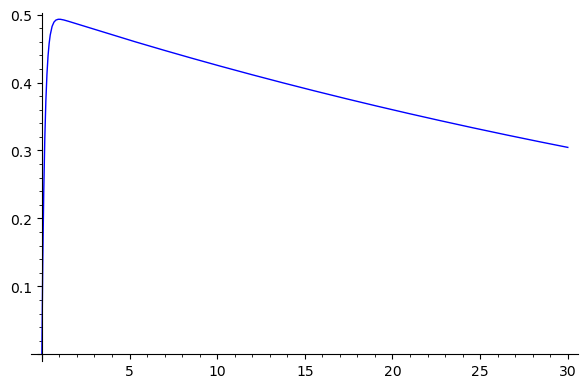

In [27]:
# This is the graph of the first term, See the initially there is no drugs in the blood, but then the level spikes up to roughly 0.65, and then tapers off as the drug leaves the blood.
t, r = var("t r")
A = 3 # This term is the amount of the drug administered in each injection.
P = 30

g = 1/89*sqrt(890)*A*e^(-3*r)*sinh(1/10*sqrt(890)*r)
plot(g(t), (t,0,30))
#the units are mg vs time (minutes)

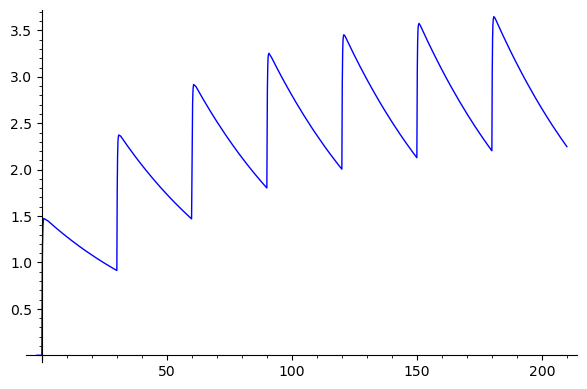

In [37]:
p = 30

x1 = A*g(t)
x2 = x1 + A*g(t-p)
x3 = x2 + A*g(t-2*p)
x4 = x3 + A*g(t-3*p)
x5 = x4 + A*g(t-4*p)
x6 = x5 + A*g(t-5*p)
x7 = x6 + A*g(t-6*p)
x8 = x7 + A*g(t-7*p)


x = piecewise([[(-infinity, 0),0],
               [[0,p],x1],
              [(p, 2*p),x2],
              [(2*p,3*p),x3],
              [(3*p,4*p),x4],
              [(4*p,5*p),x5],
              [(5*p,6*p),x6],
              [(6*p,7*p),x7],
              [(7*p,8*p),x8]])

show(plot(x,(t,-2,7*p))) # Wont show more than 8*p? I'm not sure why. 

The cell above shows that administering 3mg of the drug every 30 minutes for a patient whose anatomy matches the equation $\frac{d^2x}{dt^2} + 4\frac{dx}{dt} + 0.1x$ works very well to keep the drug in blood level within a reasonable range. In this model, the drugs in the blood disappear rather quickly. I'm not sure if this is the case in a real world scenario; regardless, once you adjust the coefficients to match the behavior of a real body, from then is just a simple matter of experimenting with dosage so that the drugs in the blood value reaches and stays within the accepatble range. It the case of the graph above, this is achieved with a dosage of 3mg applied every 30 minutes to a person whose drug in blood equation is $\frac{d^2x}{dt^2} + 4\frac{dx}{dt} + 0.1x$ The drug in blood of the patient above quickly settles into an equilibrium range between roughly 3.5 and 2 mg of the drug. In a body that holds onto the drugs longer, this value of the drugs in the blood would fluctuate less and the doses would be smaller than 3mg.

Option 2: a continuous drip administration of the drug over specified time intervals

For this scenario I will use the same patient as before ($\frac{d^2x}{dt^2} + 4\frac{dx}{dt} + 0.1x$) but will a different type of forcing function. I'm going to assume that at the top of every hour, the patient is administered drugs at rate $R$ for 30 minutes. To model a drip administration forcing function, I will have to use a piece wise function were basically f(t) = 0 for 30 minutes then $R$ for 30 minutes.

The lapalce tansform of the first 30 minutes of the forcing function is $\frac{R}{s}$ So, the first 30 minutes of the model will follow this: $L(x) = \frac{R}{(s^2 + 6s + 0.1)s}$

In [68]:
# Lapalce transform of forcing funtion when on is R/s
s = var("s")
t = var("t")
p = 30
R = 0.5

F = R/((s^2 + 6*s + 0.1)*s)
F.inverse_laplace(s,t)



-5/89*(3*sqrt(890)*sinh(1/10*sqrt(890)*t) + 89*cosh(1/10*sqrt(890)*t))*e^(-3*t) + 5

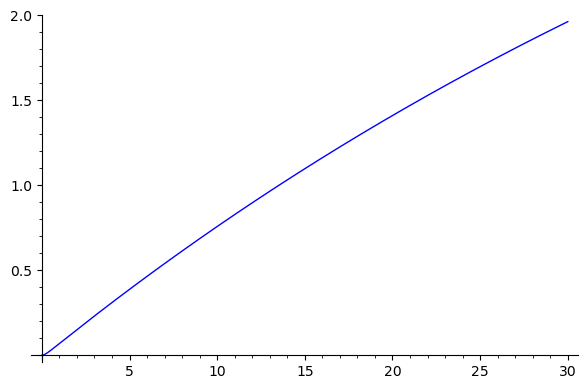

In [69]:
# This is the graph of the first term, See initially there is no drugs in the blood, but then the level spikes up to roughly 0.4
t, r = var("t r")
A = 4
P = 30

g = -5/89*(3*sqrt(890)*sinh(1/10*sqrt(890)*t) + 89*cosh(1/10*sqrt(890)*t))*e^(-3*t) + 5
plot(g(t), (t,0,30))

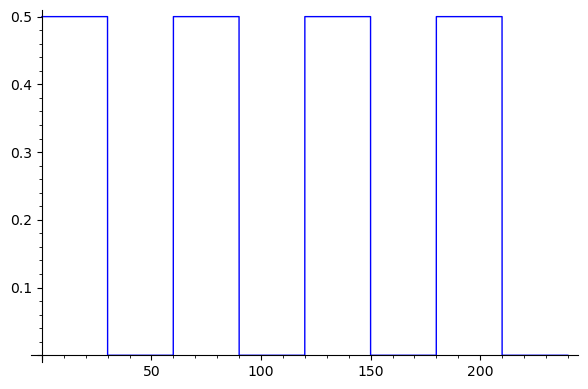

-0.5*e^(-30*s)/((s^2 + 6*s + 0.100000000000000)*s) + 0.5*e^(-60*s)/((s^2 + 6*s + 0.100000000000000)*s) - 0.5*e^(-90*s)/((s^2 + 6*s + 0.100000000000000)*s) + 0.5*e^(-120*s)/((s^2 + 6*s + 0.100000000000000)*s) - 0.5*e^(-150*s)/((s^2 + 6*s + 0.100000000000000)*s) + 0.5*e^(-180*s)/((s^2 + 6*s + 0.100000000000000)*s) - 0.5*e^(-210*s)/((s^2 + 6*s + 0.100000000000000)*s) + 0.5/((s^2 + 6*s + 0.100000000000000)*s)

In [61]:
#Make the piecewise definition of the forcing function
s = var("s")
t = var("t")
P = 30
R = 0.5

f = piecewise([
        [[0, P], R],
        [(P, 2*P), 0],
        [[2*P,3*P],R],
        [(3*P,4*P),0],
        [[4*P,5*P],R],
        [(5*P,6*P),0],
        [[6*P,7*P],R],
        [(7*P,8*P),0]])

p = plot(f,(t,0,8*P))

F = f.laplace(t,s)
G = F/(s^2 + 6*s + 0.1)
#sol = G.inverse_laplace(s,t)
#show(sol)

show(p)
show(expand(G)) #G is the solution to the model

In [65]:
#Find the inverse laplace transform of each term
a = -0.5/((s^2 + 6*s + 0.1)*s)
a.inverse_laplace(s,t)

5/89*(3*sqrt(890)*sinh(1/10*sqrt(890)*t) + 89*cosh(1/10*sqrt(890)*t))*e^(-3*t) - 5

In [66]:
#Accumulate the different timestep functions
f1 = -5/89*(3*sqrt(890)*sinh(1/10*sqrt(890)*t) + 89*cosh(1/10*sqrt(890)*t))*e^(-3*t) + 5
f2 = f1 + 5/89*(3*sqrt(890)*sinh(1/10*sqrt(890)*(t-30)) + 89*cosh(1/10*sqrt(890)*(t-30)))*e^(-3*(t-30)) - 5
f3 = f2 + -5/89*(3*sqrt(890)*sinh(1/10*sqrt(890)*(t-60)) + 89*cosh(1/10*sqrt(890)*(t-60)))*e^(-3*(t-60)) + 5
f4 = f3 + 5/89*(3*sqrt(890)*sinh(1/10*sqrt(890)*(t-90)) + 89*cosh(1/10*sqrt(890)*(t-90)))*e^(-3*(t-90)) - 5
f5 = f4 + -5/89*(3*sqrt(890)*sinh(1/10*sqrt(890)*(t-120)) + 89*cosh(1/10*sqrt(890)*(t-120)))*e^(-3*(t-120)) + 5
f6 = f5 + 5/89*(3*sqrt(890)*sinh(1/10*sqrt(890)*(t-150)) + 89*cosh(1/10*sqrt(890)*(t-150)))*e^(-3*(t-150)) - 5
f7 = f6 + -5/89*(3*sqrt(890)*sinh(1/10*sqrt(890)*(t-180)) + 89*cosh(1/10*sqrt(890)*(t-180)))*e^(-3*(t-180)) + 5
f8 = f7 + 5/89*(3*sqrt(890)*sinh(1/10*sqrt(890)*(t-210)) + 89*cosh(1/10*sqrt(890)*(t-210)))*e^(-3*(t-210)) - 5

2

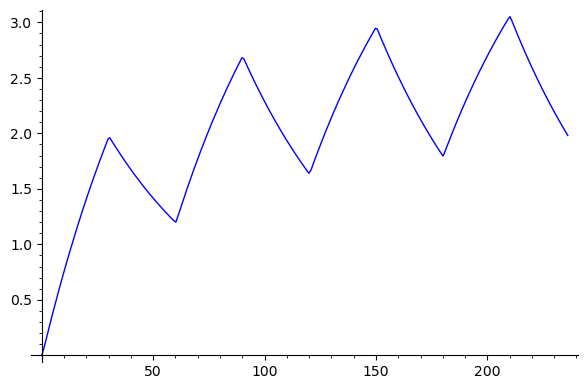

In [67]:
# Here I use each of the functions defined above and plot them for 30 minutes. The resulting graph is drugs in blood vs time.
T = piecewise([[[0, P], f1],
               [(P, 2*P), f2],
               [[2*P,3*P],f3],
               [(3*P, 4*P), f4],
               [[4*P,5*P],f5],
               [(5*P, 6*P), f6],
               [[6*P,7*P],f7],
               [(7*P, 8*P), f8]])
plot(T,(t,0,8*P))

As you can see from the model above, using a rate of $R = 0.5$ to administer drugs to the patient for 30 minutes at the top of every hour works very well. After a few cycles of administering the drug, there is constantly between 3.0 and 2.0 mg of the drug int he patient's blood.

From a modeling standpoint, the impulse function based model was way easier to manipulate and then plot. But from a medical standpoint, the drip based model is the better option for keeping a constant amount of some drug in the patient's bloodstream. The impulse model causes rapid spikes in the drug in blood value which then taper off while the drip model has less aggressive spikes in value.  With the impulse method, I think that there is a greater risk of giving too much of the drug to a patient than with the iv drip. One of the spikes could easily rocket right past the 4mg threshold. The iv drip would allow the doctors to keep the patient at the higher end of the acceptable range because the spikes are not as aggressive and thus are less likely to go past the 4 mg threshold. The oscillations of the iv drip method are 1mg, while the oscillations of the plug injection are 1.5 mg.

Despite my suggestion to use the iv drip method, the graphs above show that either the drip of the plug injection are both valid methods to maintain between 2 and 4 mg of drugs in a patients blood stream.